In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random as rd

In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

data.sample(5)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene100,884,897,878,867,853,551,609,541,549,526
gene30,139,153,127,136,163,694,708,644,687,705
gene1,424,405,389,394,390,51,72,53,63,67
gene10,837,813,799,829,802,323,321,365,349,380
gene67,447,508,462,445,476,864,875,852,868,863


In [6]:
scaled = StandardScaler().fit_transform(data)
pca = PCA()
pca_data = pca.fit_transform(scaled)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC'  + str(x) for x in range(1, len(per_var) + 1)] 


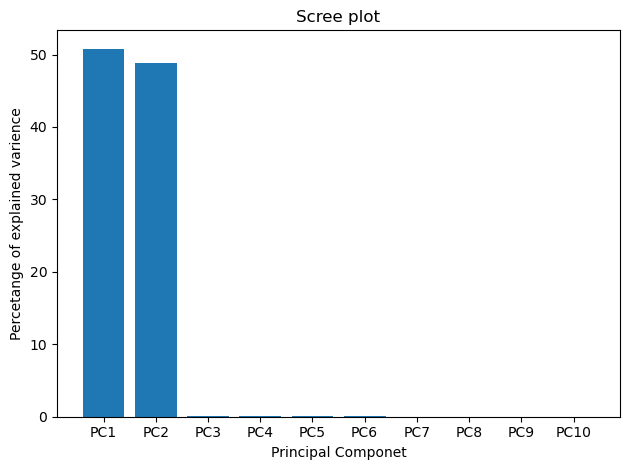

In [7]:
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percetange of explained varience')
plt.xlabel('Principal Componet')
plt.title('Scree plot')
plt.tight_layout()
plt.show()

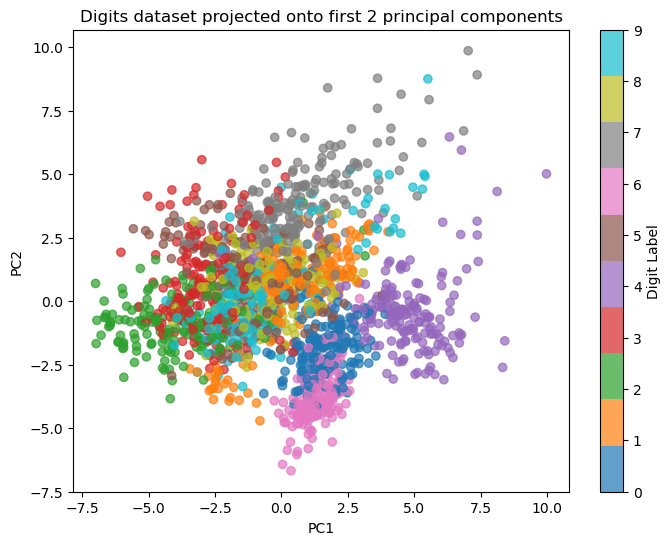

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load data (images of handwritten digits, 8x8 pixels = 64 features)
digits = load_digits()
X = digits.data
y = digits.target

# 2. Scale before PCA
X_scaled = StandardScaler().fit_transform(X)

# 3. Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Scatter plot of the first two PCs
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits dataset projected onto first 2 principal components")
plt.show()